In [1]:
!pip install pandas-datareader

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\JK\anaconda3\envs\cuda90\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pdr.get_data_yahoo('TSLA') # TESLA sock data of 5-years
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-19,23.809999,23.213333,23.704000,23.454000,75927000.0,23.454000
2017-10-20,23.636667,22.955999,23.512667,23.006666,73956000.0,23.006666
2017-10-23,23.330000,22.416668,23.325333,22.468000,86209500.0,22.468000
2017-10-24,22.853333,22.410667,22.586666,22.489332,67375500.0,22.489332
2017-10-25,22.500000,21.570667,22.446667,21.722668,128911500.0,21.722668


**Volume**: No. of shares traded on that day

# EDA

<AxesSubplot:xlabel='Date'>

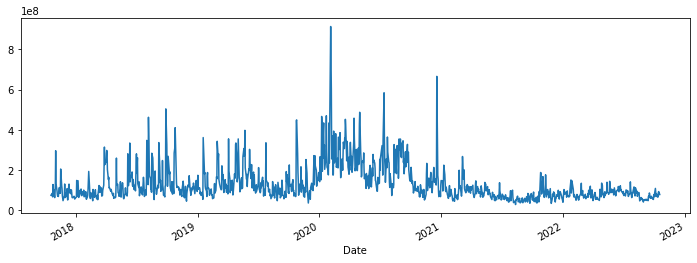

In [12]:
df['Volume'].plot(figsize=(12,4))

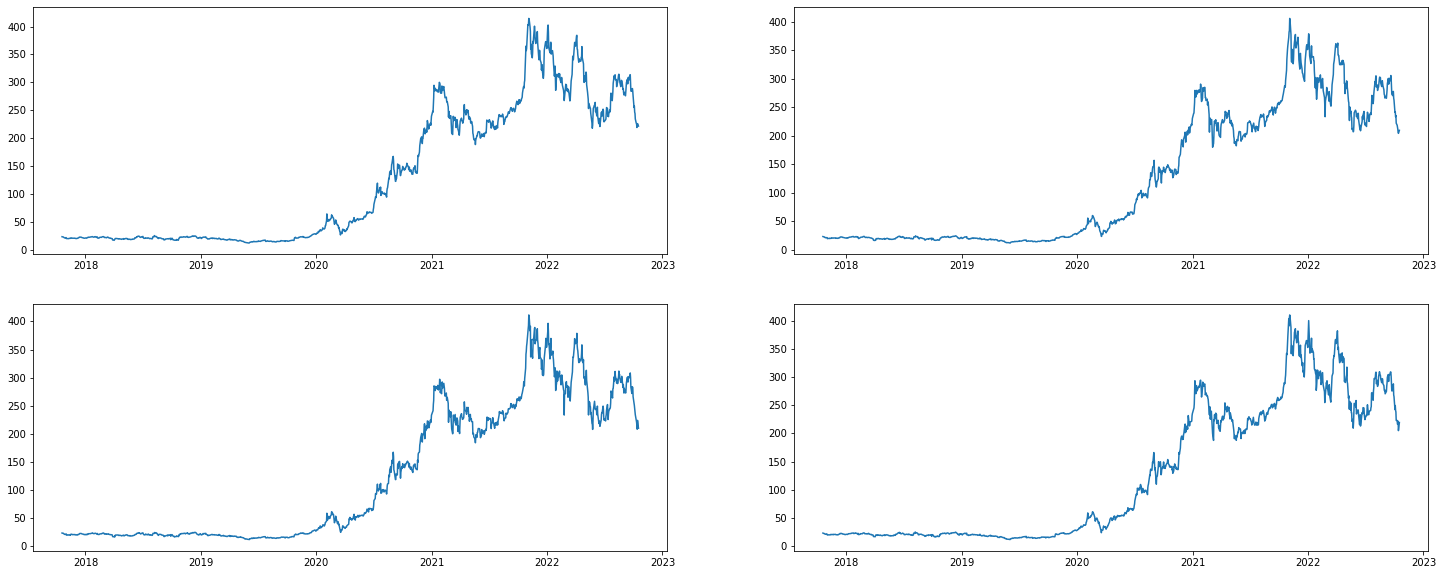

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
ax[0,0].plot(df['High'])
ax[0,1].plot(df['Low'])
ax[1,0].plot(df['Open'])
ax[1,1].plot(df['Close'])
plt.show()

<AxesSubplot:xlabel='Date'>

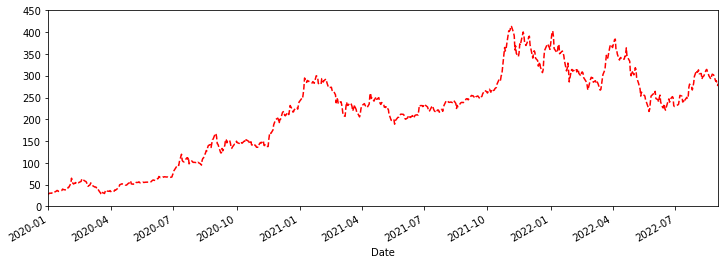

In [16]:
df['High'].plot(xlim=['2020-01-01', '2022-09-01'], ylim = [0,450], figsize=(12,4), c='red', ls='--')

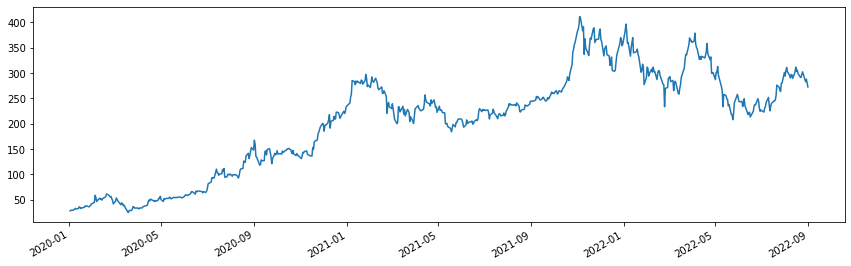

In [21]:
figure,axis=plt.subplots(figsize=(12,4))
# Prevent overlapping
plt.tight_layout()
figure.autofmt_xdate() 
axis.plot(df.loc['2020-01-01':'2022-09-01'].index, df.loc['2020-01-01':'2022-09-01']['Open'])
plt.show()

# Time resampling
https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

In [22]:
## year end frequency
df.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,20.297333,19.508667,19.966667,19.950666,48661500.0,19.950666
2018-12-31,17.355333,16.306000,16.851999,16.704000,46210500.0,16.704000
2019-12-31,12.445333,11.799333,12.073333,11.931333,36984000.0,11.931333
2020-12-31,26.990667,23.367332,24.980000,24.081333,52073100.0,24.081333
2021-12-31,188.736664,179.830002,184.183334,187.666672,29401800.0,187.666672
2022-12-31,217.973328,204.160004,207.949997,204.990005,41864700.0,204.990005


In [23]:
## quaterly start frequency
df.resample(rule='QS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-01,23.809999,23.213333,23.704000,23.454000,296871000.0,23.454000
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-01,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-01,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667
2019-10-01,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334


In [24]:
## Business End Frequency
df.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,23.809999,23.213333,23.704000,23.454000,296871000.0,23.454000
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-30,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


In [25]:
## Business Quarter End Frequency
df.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-02,23.809999,23.213333,23.704000,23.454000,296871000.0,23.454000
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-02,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-02,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667
2019-10-01,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334


<AxesSubplot:xlabel='Date'>

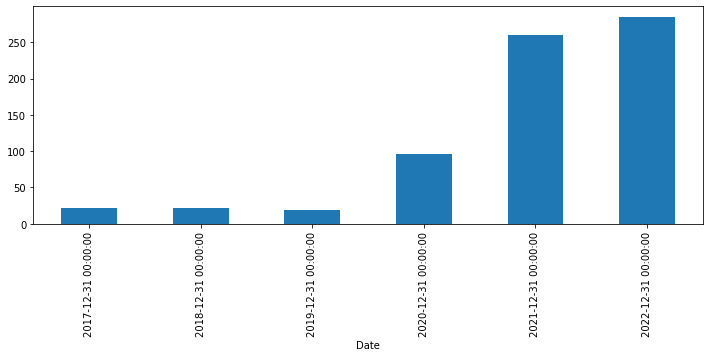

In [27]:
df['Open'].resample(rule='A').mean().plot(figsize=(12,4), kind='bar')

<AxesSubplot:xlabel='Date'>

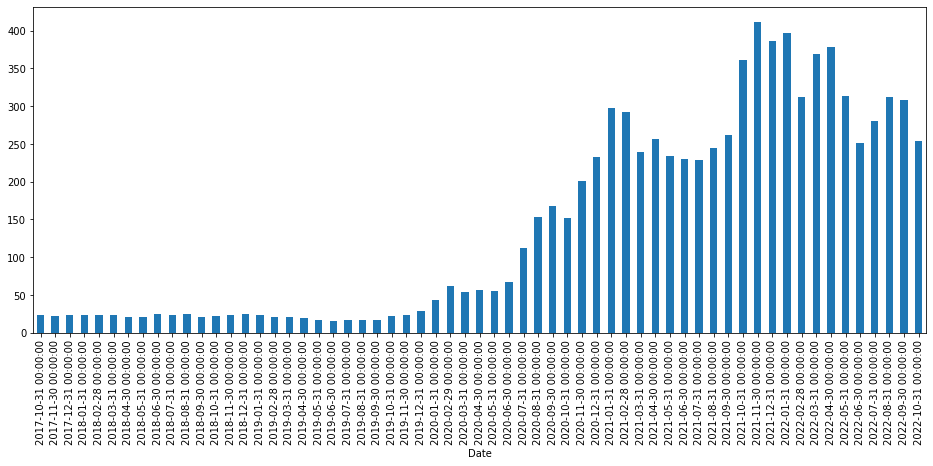

In [28]:
df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(16,6))

# Windowing or Rolling or Mean Average or `Moving Average` or MA

In [29]:
df['Open-10 days rolling'] = df['Open'].rolling(10).mean()
df.head(15)

,High,Low,Open,Close,Volume,Adj Close,Open-10 days rolling
Date,,,,,,,
2017-10-19,23.809999,23.213333,23.704000,23.454000,75927000.0,23.454000,NaN
2017-10-20,23.636667,22.955999,23.512667,23.006666,73956000.0,23.006666,NaN
2017-10-23,23.330000,22.416668,23.325333,22.468000,86209500.0,22.468000,NaN
2017-10-24,22.853333,22.410667,22.586666,22.489332,67375500.0,22.489332,NaN
2017-10-25,22.500000,21.570667,22.446667,21.722668,128911500.0,21.722668,NaN
2017-10-26,22.015333,21.546667,21.851999,21.744667,75352500.0,21.744667,NaN
2017-10-27,21.639334,21.110666,21.316668,21.391333,104695500.0,21.391333,NaN
2017-10-30,21.585333,21.150000,21.278667,21.338667,63816000.0,21.338667,NaN
2017-10-31,22.129999,21.345333,21.348667,22.101999,85084500.0,22.101999,NaN


<AxesSubplot:xlabel='Date'>

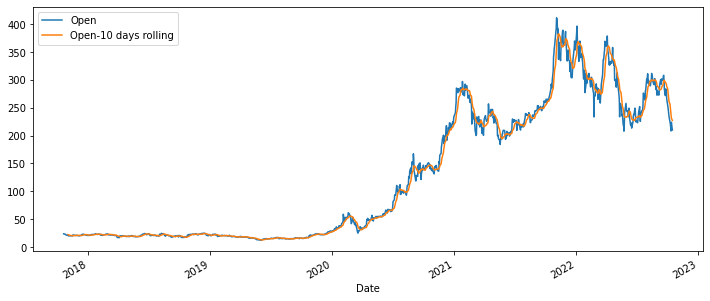

In [30]:
df[['Open','Open-10 days rolling']].plot(figsize=(12,5))

# `AIRBUS` data

In [39]:
df_air = pdr.get_data_yahoo('AIR.PA')
df_air

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-19,81.690002,80.430000,80.879997,80.720001,2118635.0,74.739456
2017-10-20,81.269997,80.220001,81.059998,80.720001,1511806.0,74.739456
2017-10-23,81.879997,80.330002,80.639999,81.290001,944252.0,75.267220
2017-10-24,83.760002,81.150002,81.209999,83.250000,2887232.0,77.082008
2017-10-25,84.330002,82.309998,82.839996,83.470001,2036221.0,77.285713
...,...,...,...,...,...,...
2022-10-12,94.419998,92.480003,94.000000,93.250000,1189418.0,93.250000
2022-10-13,97.430000,93.040001,93.510002,96.900002,1620868.0,96.900002
2022-10-14,99.339996,96.260002,98.720001,96.589996,1271176.0,96.589996


In [41]:
# Maximum price of the share from 2019 to 2022
df_air.loc['2019-01-01':'2022-10-18']['High'].max()

139.39999389648438

In [48]:
# Date of the highest price of the stock?

df_air[df_air['High'] == df_air['High'].max()].index.values

array(['2020-01-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [49]:
# Date of the lowest price of the stock?
df_air[df_air['Low'] == df_air['Low'].min()].index.values

array(['2020-03-18T00:00:00.000000000'], dtype='datetime64[ns]')